In [1]:
# importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

df = pd.read_csv("../datasets/raw/Financials.csv")

In [2]:
# realizo la exploración inicial mediante una función reutilizable
def overview(df, name):
  print("*"*20)
  print(f"{name.upper()} DATASET ")
  print("*"*20)

  # data
  print("-"*20)
  print("Type of data")
  print("-"*20)
  print(df.dtypes)

  # dataset size
  print("-"*20)
  print("Dimentions")
  print("-"*20)
  print(f"Rows: {df.shape[0]} | Columns: {df.shape[1]}")

  # nulls, duplications, etc.
  print("-"*20)
  print("Nulls")
  print("-"*20)
  print(df.isna().sum())
  print("-"*20)
  print("Duplications")
  print("-"*20)
  print(df.duplicated().sum())

  # descriptive stadistics
  print("-"*28)
  print("Descriptive Stadistics")
  print("-"*28)
  display(df.describe(include='all'))

  # first 5 rows
  print("-"*20)
  print("First 5 Rows")
  print("-"*20)
  display(df.head(5))

overview(df, "Financials")

********************
FINANCIALS DATASET 
********************
--------------------
Type of data
--------------------
Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object
--------------------
Dimentions
--------------------
Rows: 700 | Columns: 16
--------------------
Nulls
--------------------
Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts      

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
count,700,700,700,700,700,700,700,700,700,700,700,700,700,700.000000,700,700.000000
unique,5,5,6,4,510,6,7,550,515,559,545,557,16,NaN,12,NaN
top,Government,Canada,Paseo,High,$727.00,$10.00,$20.00,"$37,050.00",$-,"$4,981.00","$17,430.00",$-,01/06/2014,NaN,October,NaN
freq,300,140,202,245,5,202,100,3,53,2,4,5,70,NaN,140,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,2013.750000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.377321,NaN,0.433322
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2013.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.750000,NaN,2013.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,2014.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.250000,NaN,2014.000000


--------------------
First 5 Rows
--------------------


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


### Insights from Overview (Data Types and Structure)

* Most numeric columns (Units Sold, Manufacturing Price, Sale Price, Gross Sales, Discounts, Sales, COGS, Profit) were detected as **Object** type instead of numeric.

* Column `Date` is of type **Object**, needs conversion to **datetime** format for time-series analysis.

* Columns like `Segment`, `Country`, and `Product` are **categorical**, suitable for grouping and aggregation.

* Normalization of all rows


## Data Cleaning

In [3]:
# normalize column names

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_'))
df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

In [4]:
# convert 'date' to datetime

df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors="coerce")
df['date'] 

0     2014-01-01
1     2014-01-01
2     2014-06-01
3     2014-06-01
4     2014-06-01
         ...    
695   2014-03-01
696   2014-10-01
697   2014-02-01
698   2014-04-01
699   2014-05-01
Name: date, Length: 700, dtype: datetime64[ns]

In [5]:
# convert 'units_sold' to int type
df['units_sold'] = (
    df['units_sold']
    .astype(str)
    .str.replace(r'[$,\s]', '', regex=True))
df['units_sold'] = pd.to_numeric(df['units_sold'], errors= "coerce").astype(int)
df['units_sold'] 

0      1618
1      1321
2      2178
3       888
4      2470
       ... 
695    2475
696     546
697    1368
698     723
699    1806
Name: units_sold, Length: 700, dtype: int64

In [6]:
# convert columns to numeric
columns = ['manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit']
for col in columns:
    df[col] = (
        df[col]
        .str.replace(r'[$,\s]', '', regex=True)
        .str.strip())
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [7]:
# normalize all str columns
# detect columns of object type (text)
cols = df.select_dtypes(include='object').columns

# normalize
for col in cols:
    df[col] = (
        df[col]
        .astype(str)            # por si hay nulos mezclados
        .str.strip()            # eliminar espacios al inicio y al final
        .str.lower()            # pasar todo a minúsculas
        .str.replace(r'\s+', ' ', regex=True)  # reemplazar espacios múltiples por uno solo
    )

print("Columnas normalizadas:", cols) 
df[cols]

Columnas normalizadas: Index(['segment', 'country', 'product', 'discount_band', 'month_name'], dtype='object')


,segment,country,product,discount_band,month_name
0,government,canada,carretera,none,january
1,government,germany,carretera,none,january
2,midmarket,france,carretera,none,june
3,midmarket,germany,carretera,none,june
4,midmarket,mexico,carretera,none,june
...,...,...,...,...,...
695,small business,france,amarilla,high,march
696,small business,mexico,amarilla,high,october
697,government,mexico,montana,high,february
698,government,canada,paseo,high,april


In [8]:
# overview checking 
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    int64         
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            647 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               637 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,year
count,700.000000,700.000000,700.000000,7.000000e+02,647.000000,7.000000e+02,700.000000,637.000000,700,700.000000,700.000000
mean,1608.268571,96.477143,118.428571,1.827594e+05,14227.586198,1.696091e+05,145475.211429,27741.010267,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,1061.000000,1.592800e+04,7490.000000,3875.850000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,3108.000000,3.554020e+04,22506.250000,11106.100000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2228.750000,250.000000,300.000000,2.790250e+05,18809.250000,2.610775e+05,245607.500000,25162.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.000000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.405966,108.602612,136.775515,2.542623e+05,23562.833079,2.367263e+05,203865.506118,43059.332905,NaN,3.377321,0.433322


In [9]:
# create ddbb 
def conn ():
    con = sqlite3.connect("financials.db")
    df.to_sql("financials", con, if_exists="replace", index=False)
    return con

In [10]:
conn()
query = "SELECT COUNT(discount_band) AS discount_none FROM financials WHERE discounts IS NULL"
result = pd.read_sql_query(query, conn())
print(result)
conn().close()

   discount_none
0             53


#### Handling missing values - Discounts
* missing (`NaN`) values in the **discounts** column indicate that no discount was applied to the sale.
* therefore, these values were replaced with `0` to accurately represent a 0% discount and maintain numeric consistency for further analysis.

In [11]:
df['discounts'] = df['discounts'].fillna(0)

In [12]:
conn()
query = "SELECT discount_band, COUNT(discounts) AS number_of_discounts FROM financials GROUP BY discount_band"
result = pd.read_sql_query(query, conn())
print(result)
conn().close()

  discount_band  number_of_discounts
0          high                  245
1           low                  160
2        medium                  242
3          none                   53


#### Handling missing values - Profit
* Some rows contained missing (`NaN`) values in the **Profit** column.  
* Since profit is calculated as *Sales - COGS*, missing values were replaced by the computed result where possible.  
* If either Sales or COGS was missing, the profit value was set to 0 to maintain consistency.

In [13]:
df[df["profit"].isna()]

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
187,enterprise,mexico,montana,low,1138,5.0,125.0,142250.0,5690.00,136560.00,136560.0,NaN,2014-12-01,12,december,2014
189,enterprise,germany,paseo,low,795,10.0,125.0,99375.0,3975.00,95400.00,95400.0,NaN,2014-03-01,3,march,2014
193,enterprise,france,paseo,low,2988,10.0,125.0,373500.0,14940.00,358560.00,358560.0,NaN,2014-07-01,7,july,2014
200,enterprise,mexico,paseo,low,1138,10.0,125.0,142250.0,5690.00,136560.00,136560.0,NaN,2014-12-01,12,december,2014
209,enterprise,mexico,amarilla,low,1074,260.0,125.0,134250.0,5370.00,128880.00,128880.0,NaN,2014-04-01,4,april,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,enterprise,germany,paseo,high,1085,10.0,125.0,135625.0,20343.75,115281.25,130200.0,NaN,2014-10-01,10,october,2014
684,enterprise,france,velo,high,663,120.0,125.0,82875.0,12431.25,70443.75,79560.0,NaN,2014-09-01,9,september,2014
686,enterprise,united states of america,velo,high,2438,120.0,125.0,304750.0,45712.50,259037.50,292560.0,NaN,2013-12-01,12,december,2013
692,enterprise,canada,vtt,high,2954,250.0,125.0,369250.0,55387.50,313862.50,354480.0,NaN,2013-11-01,11,november,2013


In [14]:
df['profit'] = df['sales'] - df['cogs']
df.isna().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64

### Dataset clean and ready for EDA
* the clean version of the dataset was converted in a new csv file saved in /datasets/clean

In [15]:
df.to_csv("../datasets/clean/Financials_clean.csv")

## EDA (Exploratory Data Analysis)

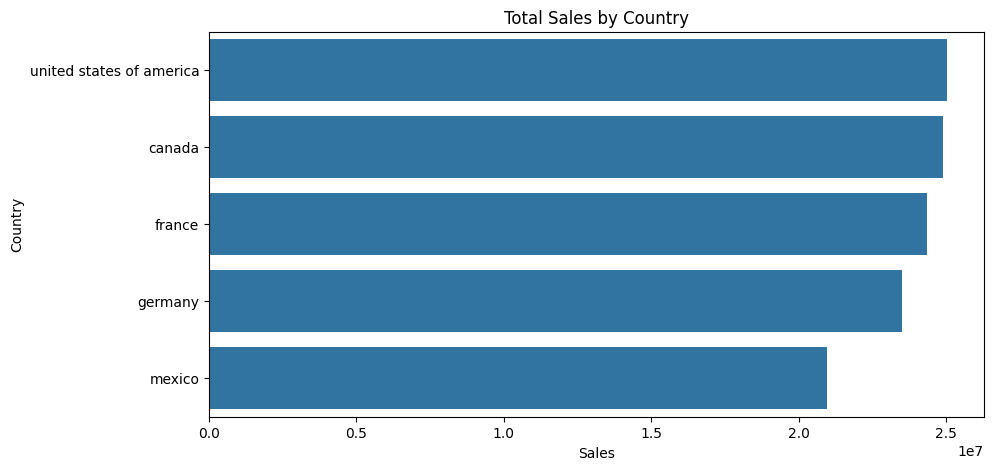

In [16]:
sales_by_country = df.groupby("country")["sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index)
plt.title("Total Sales by Country")
plt.xlabel("Sales")
plt.ylabel("Country")
plt.show()

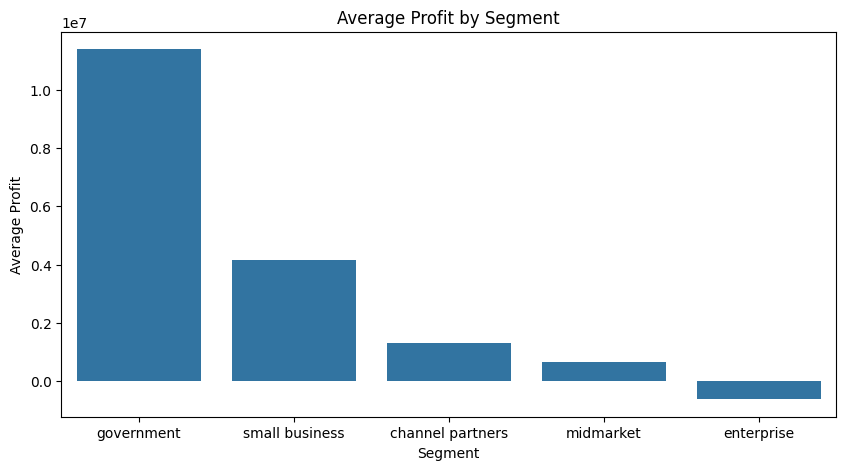

In [17]:
profit_segment = df.groupby("segment")["profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=profit_segment.index, y=profit_segment.values)
plt.title("Average Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Profit")
plt.show()

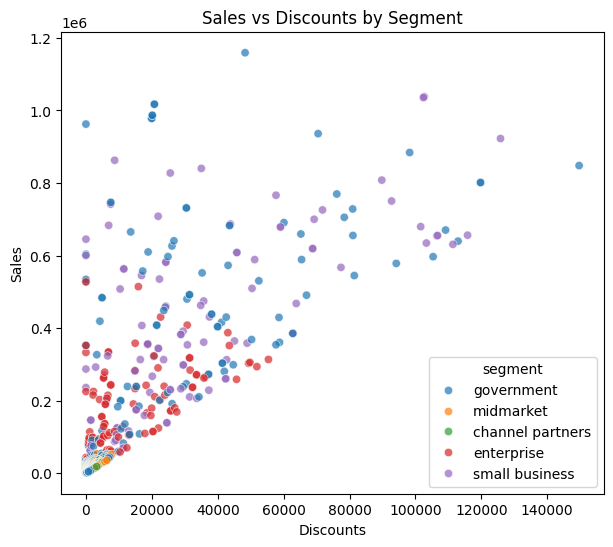

In [18]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x="discounts", y="sales", hue="segment", alpha=0.7)
plt.title("Sales vs Discounts by Segment")
plt.xlabel("Discounts")
plt.ylabel("Sales")
plt.show()

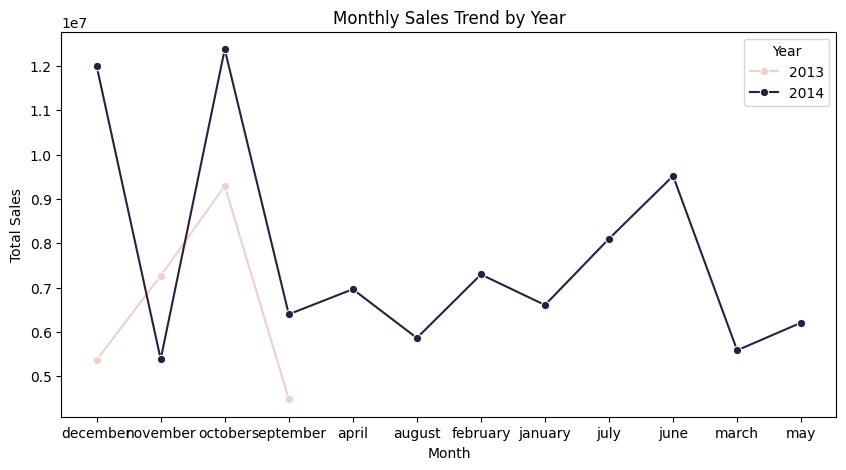

In [19]:
sales_time = df.groupby(["year", "month_name"])["sales"].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=sales_time, x="month_name", y="sales", hue="year", marker="o")
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.show()